In [4]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

import config as cfg

def smoothing(data):
    if len(data.shape) == 1:
        return moving_average(medfilt(data, kernel_size=7))
    elif len(data.shape) == 2:
        new_temp = []
        for i in range(data.shape[1]):
            data[:, i] = medfilt(data[:, i], kernel_size=7)
            new_temp.append(moving_average(data[:, i]))
        new_temp = np.array(new_temp)
        return new_temp.T

def moving_average(data, window_size=5):
    # add multi channel support
    if len(data.shape) == 1:
        return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    elif len(data.shape) == 2:
        new_temp = []
        for i in range(data.shape[1]):
            new_temp.append(np.convolve(data[:, i], np.ones(window_size)/window_size, mode='valid'))
        new_temp = np.array(new_temp)
        return new_temp.T
    else:
        raise ValueError("Data shape is not supported")

def get_velocity(data):
    return np.diff(data, axis=0)

def angles(start_point, e1, e2):
    a = e1 - start_point
    b = e2 - start_point
    dot_product = torch.sum(a * b, dim=1)  # 각 행별로 내적 계산

    # 벡터 크기 계산
    a_norm = torch.norm(a, dim=1)  # 각 벡터의 크기
    b_norm = torch.norm(b, dim=1)  # 각 벡터의 크기

    # 코사인 값 계산 (클리핑 추가로 안정성 확보)
    cos_theta = dot_product / (a_norm * b_norm + 1e-8)
    cos_theta = torch.clamp(cos_theta, -1.0, 1.0)  # -1 ~ 1 사이로 제한

    # 각도 변환 (라디안 → 도)
    angles = torch.acos(cos_theta)  # 라디안 단위
    angles_deg = torch.rad2deg(angles)  # 도(degree) 단위 변환
    return angles_deg

In [3]:
data_path = './output'
exercises = ['sald-teong-3', 'sald-teong-9']
datas = [f'{data_path}/{p}' for p in exercises]

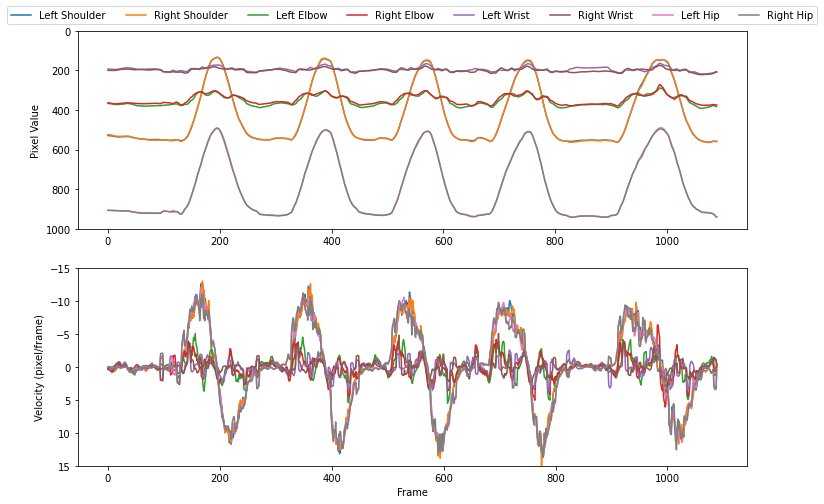

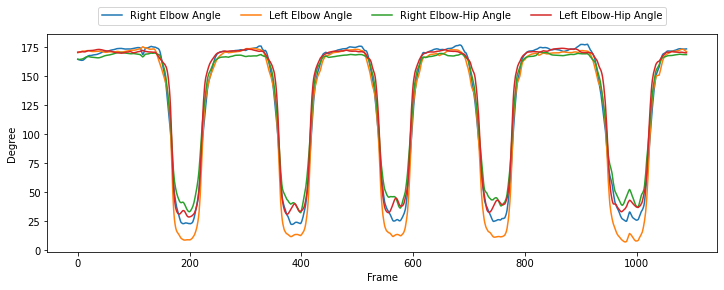

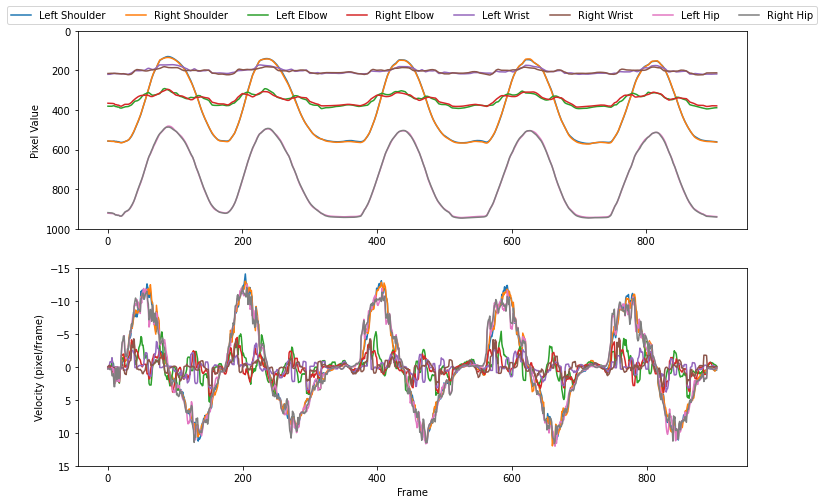

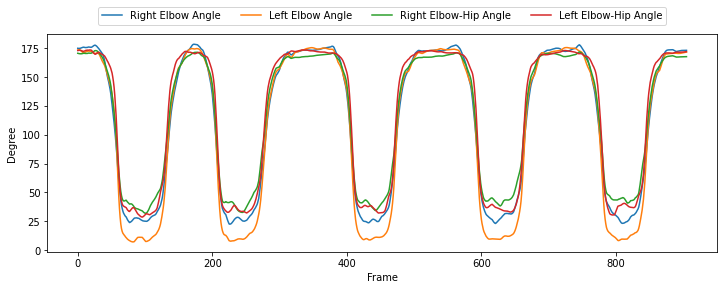

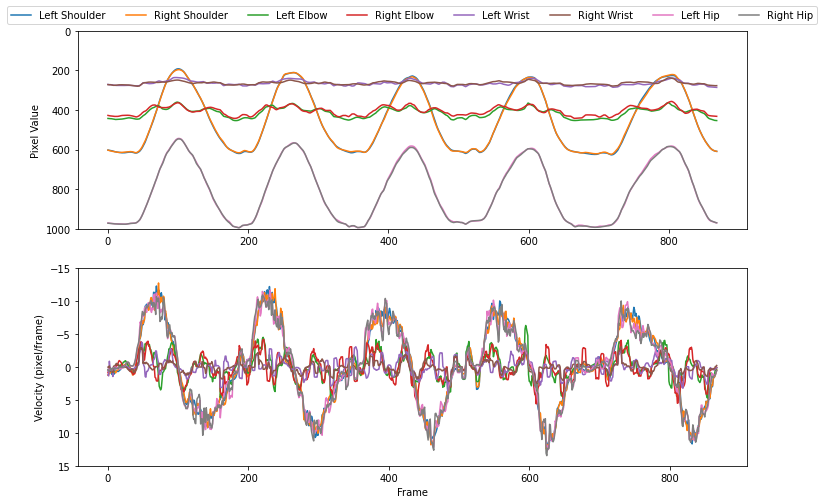

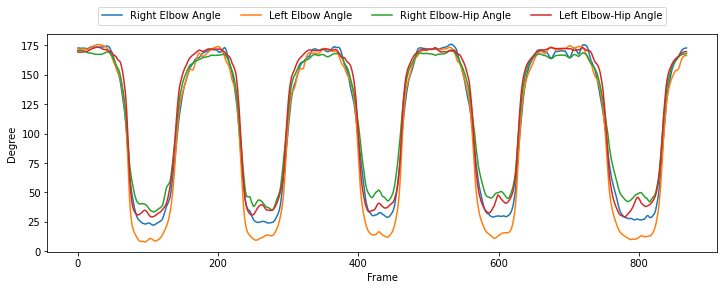

In [90]:
exercises = ['pullup-zackery-1']
exercises = ['pullup-zackery-1', 'pullup-zackery-2', 'pullup-zackery-3']
datas = [f'{data_path}/{p}' for p in exercises]
for idx, p in enumerate(datas):
    with open(p+f'/{exercises[idx]}.pkl', 'rb') as f:
        data = pickle.load(f)
    fig, ax1 = plt.subplots(2, 1, figsize=(12, 8))
    for k,v in data['data'].items():
        # plt.subplot(2,1,1)
        # plt.plot(moving_average(medfilt(torch.stack(v)[:,0].numpy(), kernel_size=7)), label=cfg.label2key[k])
        if k in cfg.upper_body:
            plt.subplot(2,1,1)
            plt.plot(moving_average(medfilt(torch.stack(v)[:,1].numpy(), kernel_size=7)), label=cfg.label2key[k])
            plt.ylabel('Pixel Value')
            plt.ylim([1000,0])
            plt.legend(ncol=9, loc='upper center', bbox_to_anchor=(0.5, 1.15))
            plt.subplot(2,1,2)
            plt.plot(get_velocity(smoothing(torch.stack(v)[:,1].numpy())), label=cfg.label2key[k])
            plt.ylabel('Velocity (pixel/frame)')
            plt.ylim([15,-15])
            plt.xlabel('Frame')
    plt.show()
    # plt.figure(figsize=(12,4))
    left_elbow     = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Elbow']]).numpy())    )
    right_elbow    = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Elbow']]).numpy())   )
    left_shoulder  = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Shoulder']]).numpy()) )
    right_shoulder = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Shoulder']]).numpy()))
    left_wrist     = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Wrist']]).numpy())    )
    right_wrist    = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Wrist']]).numpy())   )
    left_hip       = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Hip']]).numpy())      )
    right_hip      = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Hip']]).numpy())     )

    right_angle = angles(right_elbow[:,:2], right_shoulder[:,:2], right_wrist[:,:2])
    left_angle = angles(left_elbow[:,:2], left_shoulder[:,:2], left_wrist[:,:2])
    right_elbow_hip = angles(right_shoulder[:,:2], right_elbow[:,:2], right_hip[:,:2])
    left_elbow_hip = angles(left_shoulder[:,:2], left_elbow[:,:2], left_hip[:,:2])
    plt.figure(figsize=(12,4))
    plt.plot(right_angle, label='Right Elbow Angle')
    plt.plot(left_angle, label='Left Elbow Angle')
    plt.plot(right_elbow_hip, label='Right Elbow-Hip Angle')
    plt.plot(left_elbow_hip, label='Left Elbow-Hip Angle')
    plt.ylabel('Degree')
    plt.xlabel('Frame')
    plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))
    plt.show()




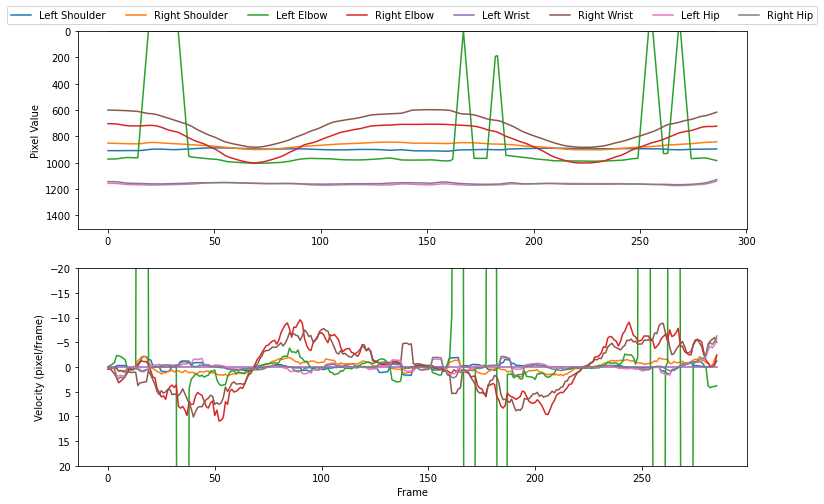

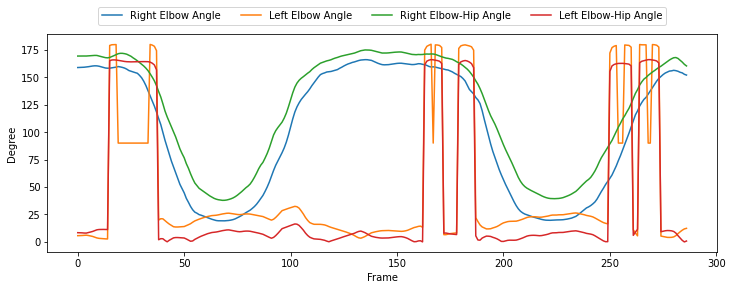

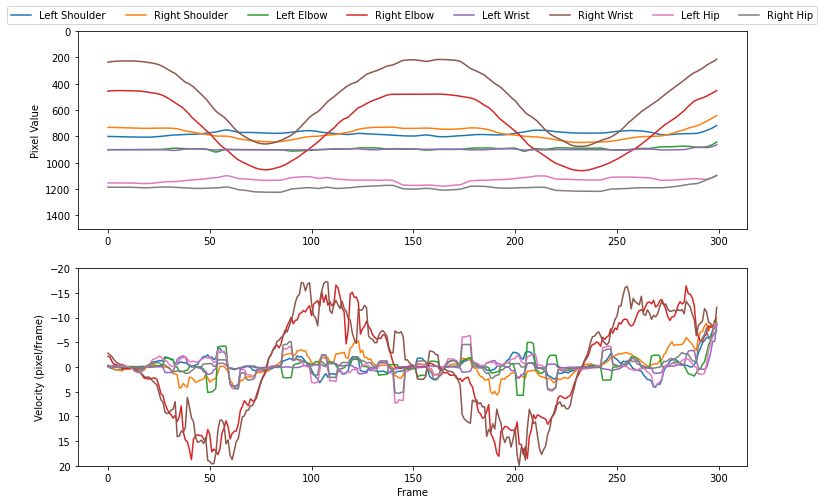

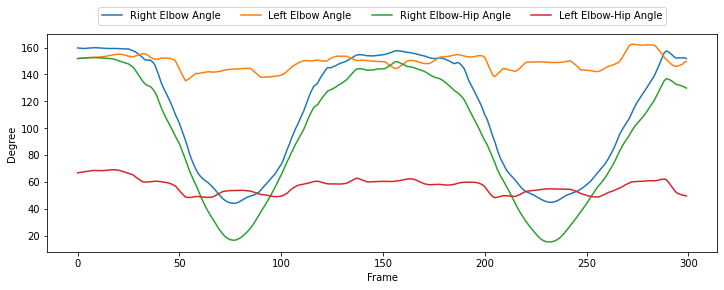

In [98]:
data_path = './output'
exercises = ['sald-teong-3', 'sald-teong-9']
datas = [f'{data_path}/{p}' for p in exercises]
for idx, p in enumerate(datas):
    with open(p+f'/{exercises[idx]}.pkl', 'rb') as f:
        data = pickle.load(f)
    fig, ax1 = plt.subplots(2, 1, figsize=(12, 8))
    for k,v in data['data'].items():
        # plt.subplot(2,1,1)
        # plt.plot(moving_average(medfilt(torch.stack(v)[:,0].numpy(), kernel_size=7)), label=cfg.label2key[k])
        if k in cfg.upper_body:
            plt.subplot(2,1,1)
            plt.plot(moving_average(medfilt(torch.stack(v)[:,1].numpy(), kernel_size=7))[-300:], label=cfg.label2key[k])
            plt.ylabel('Pixel Value')
            plt.ylim([1500,0])
            plt.legend(ncol=9, loc='upper center', bbox_to_anchor=(0.5, 1.15))
            plt.subplot(2,1,2)
            plt.plot(get_velocity(smoothing(torch.stack(v)[:,1].numpy()))[-300:], label=cfg.label2key[k])
            plt.ylabel('Velocity (pixel/frame)')
            plt.ylim([20,-20])
            plt.xlabel('Frame')
    plt.show()
    # plt.figure(figsize=(12,4))
    left_elbow     = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Elbow']]).numpy())    )[-300:]
    right_elbow    = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Elbow']]).numpy())   )[-300:]
    left_shoulder  = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Shoulder']]).numpy()) )[-300:]
    right_shoulder = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Shoulder']]).numpy()))[-300:]
    left_wrist     = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Wrist']]).numpy())    )[-300:]
    right_wrist    = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Wrist']]).numpy())   )[-300:]
    left_hip       = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Hip']]).numpy())      )[-300:]
    right_hip      = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Hip']]).numpy())     )[-300:]

    right_angle = angles(right_elbow[:,:2], right_shoulder[:,:2], right_wrist[:,:2])
    left_angle = angles(left_elbow[:,:2], left_shoulder[:,:2], left_wrist[:,:2])
    right_elbow_hip = angles(right_shoulder[:,:2], right_elbow[:,:2], right_hip[:,:2])
    left_elbow_hip = angles(left_shoulder[:,:2], left_elbow[:,:2], left_hip[:,:2])
    plt.figure(figsize=(12,4))
    plt.plot(right_angle, label='Right Elbow Angle')
    plt.plot(left_angle, label='Left Elbow Angle')
    plt.plot(right_elbow_hip, label='Right Elbow-Hip Angle')
    plt.plot(left_elbow_hip, label='Left Elbow-Hip Angle')
    plt.ylabel('Degree')
    plt.xlabel('Frame')
    plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))
    plt.show()




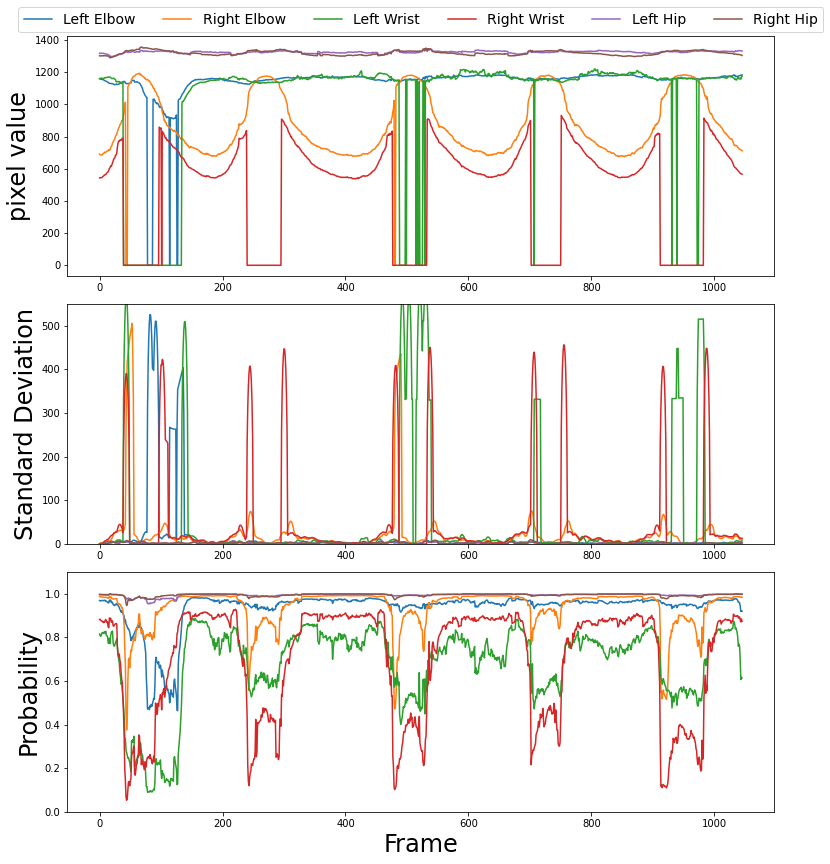

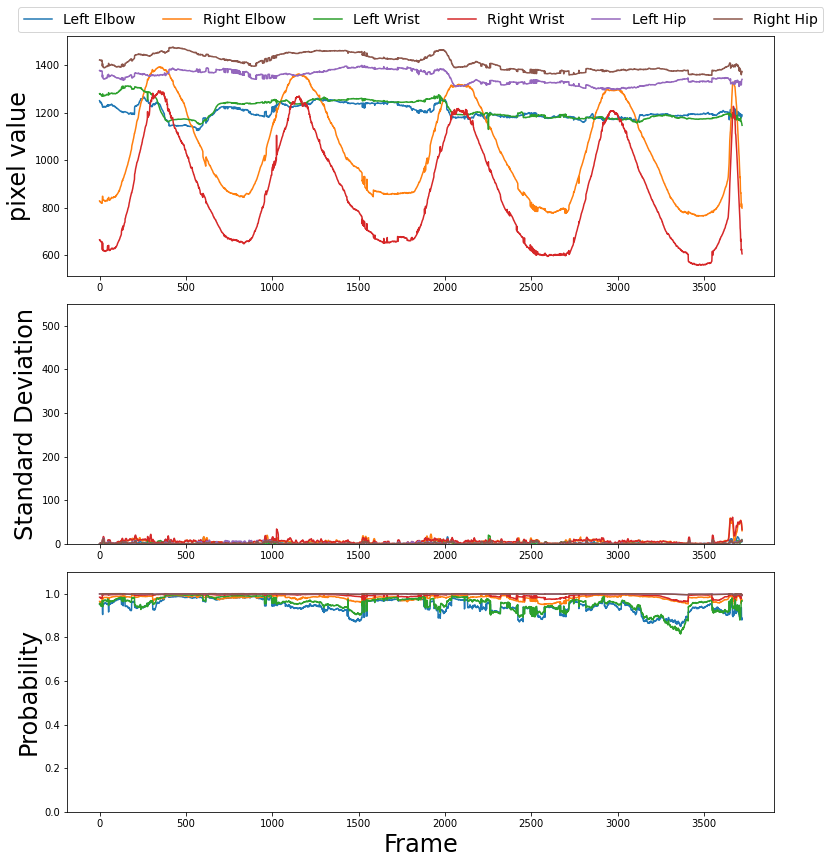

In [138]:
def windowed_std(data, window_size=10):
    # window 내부의 data의 std를 계산
    std = []
    for i in range(len(data)):
        if i < window_size:
            std.append(np.std(data[:i+1]))
        else:
            std.append(np.std(data[i-window_size:i+1]))
    return std

data_path = './output'
exercises = ['sald-teong-1', 'sald-teong-7']
datas = [f'{data_path}/{p}' for p in exercises]
fs = 24
for idx, p in enumerate(datas):
    with open(p+f'/{exercises[idx]}.pkl', 'rb') as f:
        data = pickle.load(f)
    fig, ax1 = plt.subplots(3, 1, figsize=(12, 12))
    for k,v in data['data'].items():
        # plt.subplot(2,1,1)
        # plt.plot(moving_average(medfilt(torch.stack(v)[:,0].numpy(), kernel_size=7)), label=cfg.label2key[k])
        if k in [7,8,9,10,11,12]: # cfg.upper_body:
            plt.subplot(3,1,1)
            plt.plot(torch.stack(v)[:,1].numpy(), label=cfg.label2key[k])
            plt.ylabel('pixel value', fontsize=fs)
            plt.legend(ncol=9, loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=14)
            plt.subplot(3,1,2)
            plt.plot(windowed_std(torch.stack(v)[:,1].numpy()), label=cfg.label2key[k])
            plt.ylabel('Standard Deviation', fontsize=fs)
            plt.ylim(0,550)
            plt.subplot(3,1,3)
            plt.plot(torch.stack(data['conf'][k]).numpy(), label=cfg.label2key[k])
            plt.ylabel('Probability', fontsize=fs)
            plt.xlabel('Frame', fontsize=fs)
            plt.ylim([0,1.1])
    plt.tight_layout()
    plt.show()

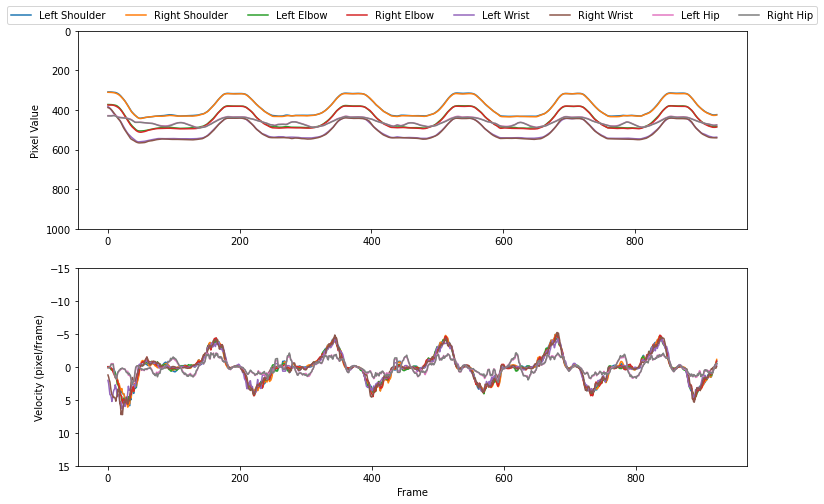

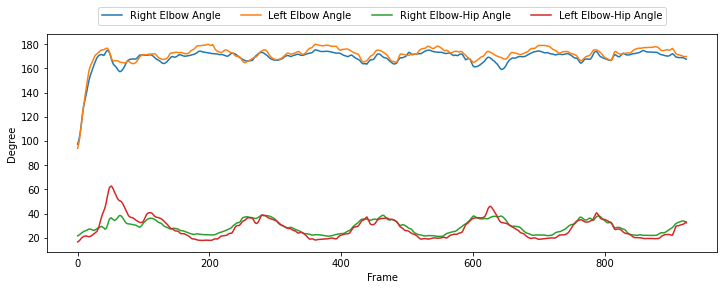

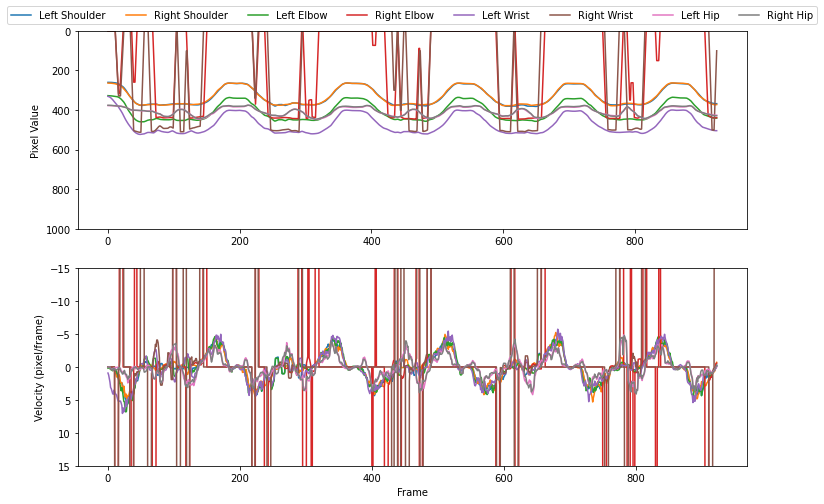

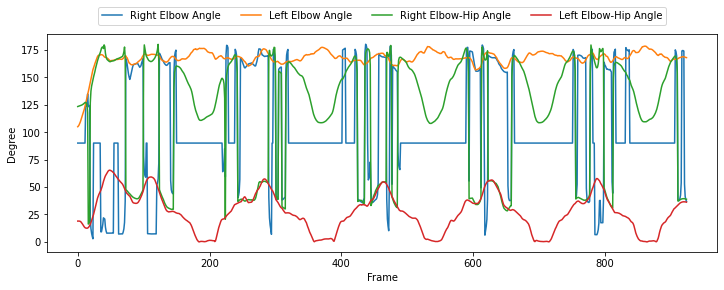

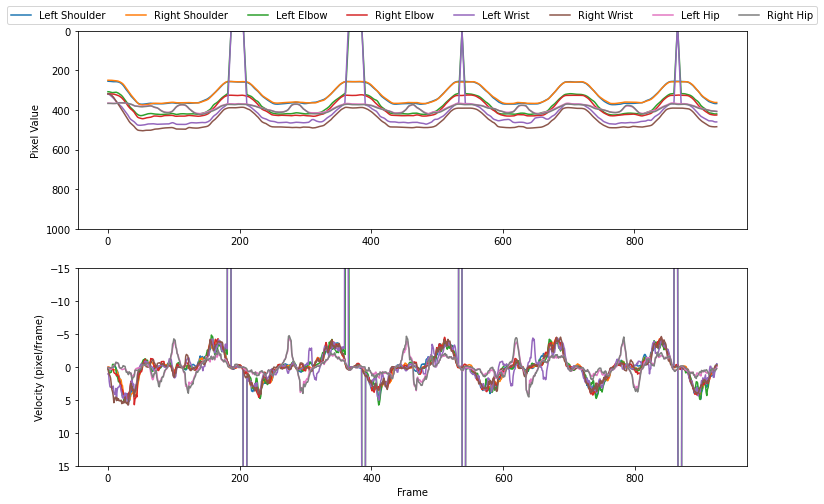

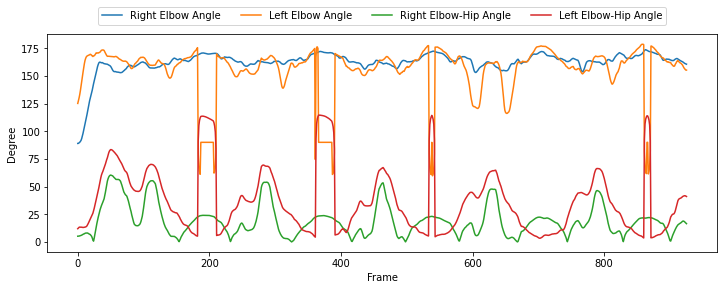

In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

import config as cfg

def smoothing(data):
    if len(data.shape) == 1:
        return moving_average(medfilt(data, kernel_size=7))
    elif len(data.shape) == 2:
        new_temp = []
        for i in range(data.shape[1]):
            data[:, i] = medfilt(data[:, i], kernel_size=7)
            new_temp.append(moving_average(data[:, i]))
        new_temp = np.array(new_temp)
        return new_temp.T

def moving_average(data, window_size=5):
    # add multi channel support
    if len(data.shape) == 1:
        return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    elif len(data.shape) == 2:
        new_temp = []
        for i in range(data.shape[1]):
            new_temp.append(np.convolve(data[:, i], np.ones(window_size)/window_size, mode='valid'))
        new_temp = np.array(new_temp)
        return new_temp.T
    else:
        raise ValueError("Data shape is not supported")

def get_velocity(data):
    return np.diff(data, axis=0)

def angles(start_point, e1, e2):
    a = e1 - start_point
    b = e2 - start_point
    dot_product = torch.sum(a * b, dim=1)  # 각 행별로 내적 계산

    # 벡터 크기 계산
    a_norm = torch.norm(a, dim=1)  # 각 벡터의 크기
    b_norm = torch.norm(b, dim=1)  # 각 벡터의 크기

    # 코사인 값 계산 (클리핑 추가로 안정성 확보)
    cos_theta = dot_product / (a_norm * b_norm + 1e-8)
    cos_theta = torch.clamp(cos_theta, -1.0, 1.0)  # -1 ~ 1 사이로 제한

    # 각도 변환 (라디안 → 도)
    angles = torch.acos(cos_theta)  # 라디안 단위
    angles_deg = torch.rad2deg(angles)  # 도(degree) 단위 변환
    return angles_deg

data_path = './output'
exercises = ['1-frontcut', '1-leftcut', '1-rightcut']
datas = [f'{data_path}/{p}' for p in exercises]

# exercises = ['pullup-zackery-1']
# exercises = ['pullup-zackery-1', 'pullup-zackery-2', 'pullup-zackery-3']
datas = [f'{data_path}/{p}' for p in exercises]
for idx, p in enumerate(datas):
    with open(p+f'/{exercises[idx]}.pkl', 'rb') as f:
        data = pickle.load(f)
    fig, ax1 = plt.subplots(2, 1, figsize=(12, 8))
    for k,v in data['data'].items():
        # plt.subplot(2,1,1)
        # plt.plot(moving_average(medfilt(torch.stack(v)[:,0].numpy(), kernel_size=7)), label=cfg.label2key[k])
        if k in cfg.upper_body:
            plt.subplot(2,1,1)
            plt.plot(moving_average(medfilt(torch.stack(v)[:,1].numpy(), kernel_size=7)), label=cfg.label2key[k])
            plt.ylabel('Pixel Value')
            plt.ylim([1000,0])
            plt.legend(ncol=9, loc='upper center', bbox_to_anchor=(0.5, 1.15))
            plt.subplot(2,1,2)
            plt.plot(get_velocity(smoothing(torch.stack(v)[:,1].numpy())), label=cfg.label2key[k])
            plt.ylabel('Velocity (pixel/frame)')
            plt.ylim([15,-15])
            plt.xlabel('Frame')
    plt.show()
    # plt.figure(figsize=(12,4))
    left_elbow     = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Elbow']]).numpy())    )
    right_elbow    = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Elbow']]).numpy())   )
    left_shoulder  = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Shoulder']]).numpy()) )
    right_shoulder = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Shoulder']]).numpy()))
    left_wrist     = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Wrist']]).numpy())    )
    right_wrist    = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Wrist']]).numpy())   )
    left_hip       = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Left Hip']]).numpy())      )
    right_hip      = torch.tensor(smoothing(torch.stack(data['data'][cfg.key2label['Right Hip']]).numpy())     )

    right_angle = angles(right_elbow[:,:2], right_shoulder[:,:2], right_wrist[:,:2])
    left_angle = angles(left_elbow[:,:2], left_shoulder[:,:2], left_wrist[:,:2])
    right_elbow_hip = angles(right_shoulder[:,:2], right_elbow[:,:2], right_hip[:,:2])
    left_elbow_hip = angles(left_shoulder[:,:2], left_elbow[:,:2], left_hip[:,:2])
    plt.figure(figsize=(12,4))
    plt.plot(right_angle, label='Right Elbow Angle')
    plt.plot(left_angle, label='Left Elbow Angle')
    plt.plot(right_elbow_hip, label='Right Elbow-Hip Angle')
    plt.plot(left_elbow_hip, label='Left Elbow-Hip Angle')
    plt.ylabel('Degree')
    plt.xlabel('Frame')
    plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))
    plt.show()

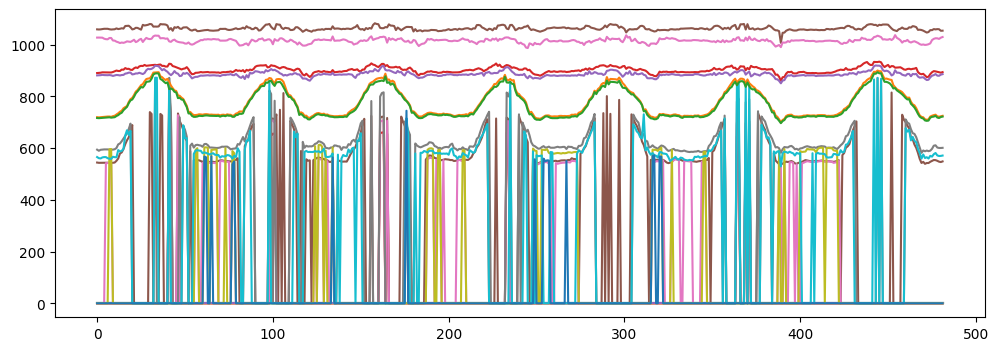

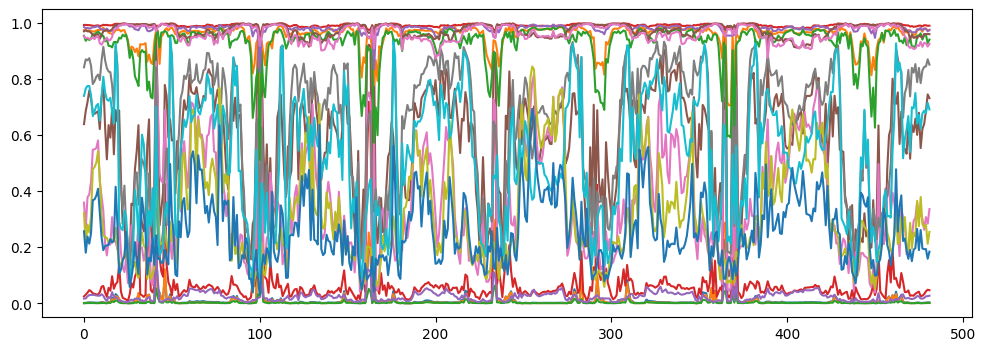

In [29]:
import torch
import pickle
import numpy as np
import config as cfg
import matplotlib.pyplot as plt

with open('./tracked_output.pkl', 'rb') as f:
    data = pickle.load(f)
    data['data'] = np.array(data['data']).transpose(0, 2, 1)
    data['conf'] = np.array(data['conf'])

plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['data'][:,i,1])
plt.show()
plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['conf'][:,i])
plt.show()

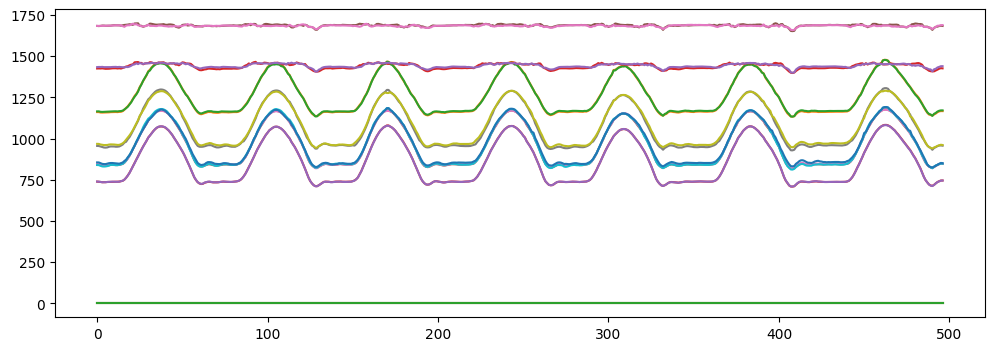

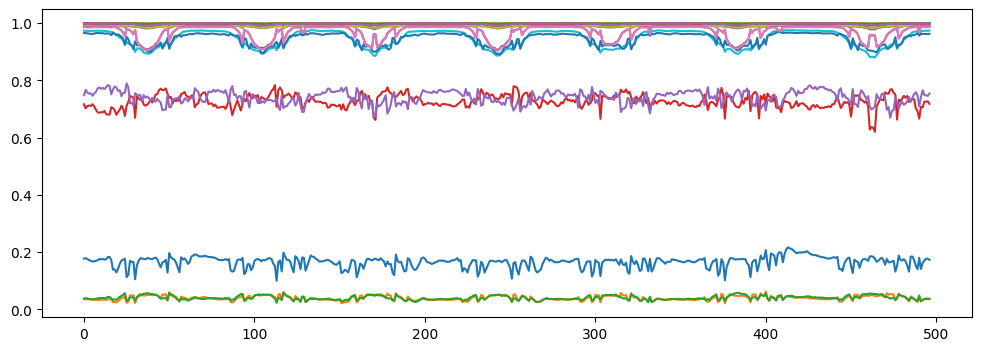

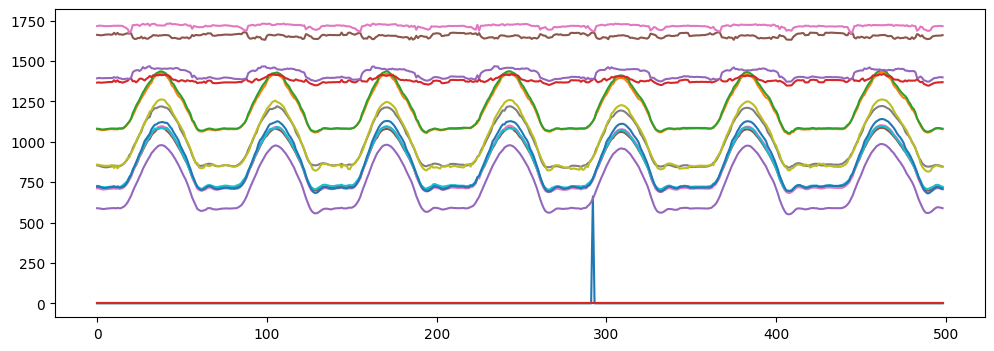

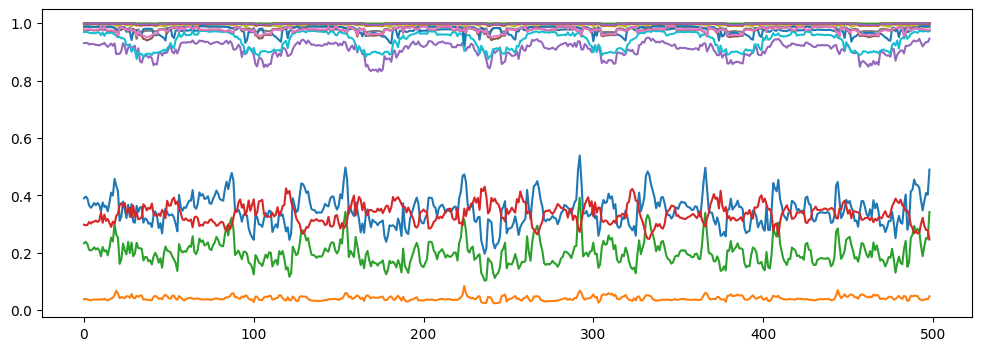

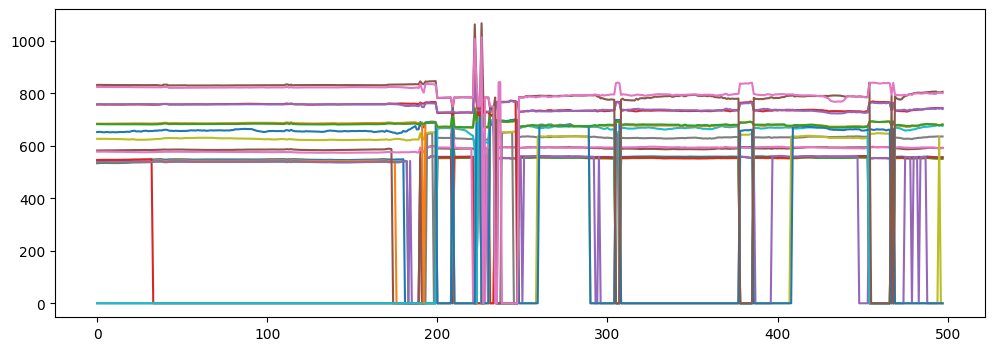

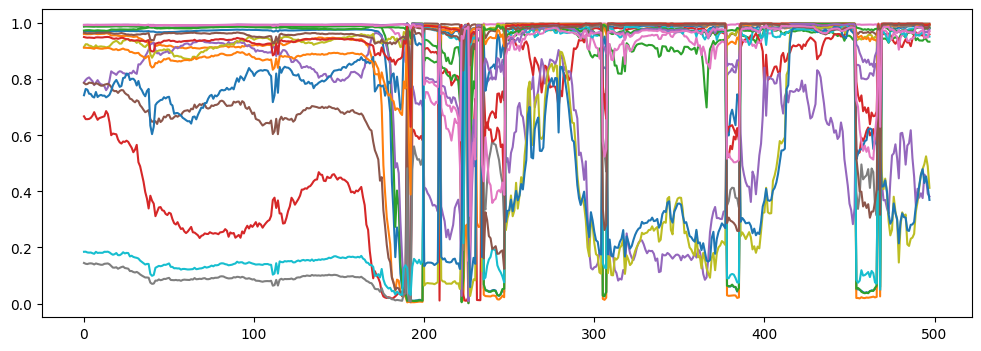

In [30]:
import torch
import pickle
import numpy as np
import config as cfg
import matplotlib.pyplot as plt

with open('./output/B1/B1.pkl', 'rb') as f:
    data = pickle.load(f)
    data['data'] = np.array(data['keypoints'])
    data['conf'] = np.array(data['conf'])

plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['data'][:,i,1])
plt.show()
plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['conf'][:,i])
plt.show()

with open('./output/D1/D1.pkl', 'rb') as f:
    data = pickle.load(f)
    data['data'] = np.array(data['keypoints'])
    data['conf'] = np.array(data['conf'])

plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['data'][:,i,1])
plt.show()
plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['conf'][:,i])
plt.show()

with open('./output/L1/L1.pkl', 'rb') as f:
    data = pickle.load(f)
    data['data'] = np.array(data['keypoints'])
    data['conf'] = np.array(data['conf'])

plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['data'][:,i,1])
plt.show()
plt.figure(figsize=(12,4))
for i in range(17):
    plt.plot(data['conf'][:,i])
plt.show()